# ☘️ AI-Driven Plant Disease Detection System ☘️

## Introduction

### Project Overview
The PlantPatrol project is an innovative initiative developed by a group of dedicated students from the Catholic University of Eastern Africa. This project leverages cutting-edge artificial intelligence (AI) to address critical issues in agriculture and food security. By creating an AI-driven plant disease detection system, PlantPatrol aims to provide farmers with an accessible, real-time tool for diagnosing plant diseases, thereby enhancing crop health and yield.

### Problem Statement & Stakeholder

**Problem Statement:**
Plant diseases pose a significant threat to global food security, resulting in substantial crop losses and adversely affecting farmers, particularly those in developing regions. Traditional detection methods often require expert knowledge, are time-consuming, and are inaccessible to small-scale farmers. This delay exacerbates the spread of diseases and reduces crop yields. In response, the PlantPatrol project proposes an AI-driven plant disease detection system that leverages image recognition technology to offer real-time, accurate disease diagnoses. Integrated with mobile technology, farmers can upload images of their crops and receive instant analysis, allowing for immediate and informed action.

**Stakeholders:**
- **Farmers:** Primary users of the system who will benefit from timely disease detection and management.
- **Agricultural Experts:** Provide insights and validation for the AI model and its recommendations.
- **Local Agricultural Organizations:** Support the dissemination of the technology and its adoption among farmers.
- **Government Agencies:** Interested in improving food security and agricultural productivity.
- **Researchers and Academics:** May use the data and findings for further studies in agriculture and AI applications.

### Dataset Description

**Key Features of the Dataset:**
The dataset used in the PlantPatrol project consists of images of various plants and their corresponding diseases. Key features include:
- **Plant Species:** Different types of plants included in the dataset (e.g., Strawberry, Apple, Tomato).
- **Disease Categories:** Various diseases affecting the plants (e.g., Apple Scab, Leaf Mold).
- **Image Count:** The number of images available for each plant and disease category.

**Target Variable:**
The target variable for the model is the classification of plant diseases based on the input images. The model aims to predict the disease category for a given plant image.

### Objectives

**Specific Objective:**
- Develop an AI-based image recognition system for real-time plant disease diagnosis.

**Additional Objectives:**
- Design an intuitive WhatsApp chatbot for farmers of varying technical backgrounds.
- Ensure rapid, accessible disease detection through mobile and cloud integration.
- Adapt the system for regional crops and diseases.
- Incorporate educational resources for disease prevention and treatment.
- Offer multilingual support for diverse regions.
- Track environmental and economic impact by monitoring pesticide use reduction and crop health improvements.
- Ensure data privacy and security.
- Establish a continuous feedback loop for system improvements based on user input.

### Methodology

**Data Collection:**
The [plant disease image dataset](https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset) was sourced from a publicly available repository, specifically targeting images of plants and their diseases. This dataset includes a diverse range of plant species and associated diseases to ensure comprehensive coverage.

**Data Preprocessing:**
The collected images were preprocessed to standardize their size and format, ensuring consistency for model training. This included resizing images to 128x128 pixels and normalizing pixel values.

**Model Development:**
A Convolutional Neural Network (CNN) was developed using TensorFlow’s Keras API. The model architecture includes multiple convolutional layers for feature extraction, dropout layers to prevent overfitting, and dense layers for classification into the various disease categories.

**Validation:**
The model was validated using a separate validation dataset to assess its performance and ensure it generalizes well to unseen data.

**Testing:**
Finally, the model was tested on a test dataset to evaluate its accuracy and effectiveness in real-world scenarios, ensuring it meets the needs of farmers for timely and accurate disease detection.

### Group Information
- **Group Name:** PlantPatrol
- **Supervisor:** Dr. Stanley Mwangi Chege, PhD (Email: stanley.mwangichege@gmail.com)
- **Group Members:**
  - Isaac Ngugi (Group Lead: itsngugiisaackinyanjui@gmail.com)
  - Naftali Koome
  - Serena Waithera
- **Group Slogan:** Your Plants, Our Priority
- **Topic:** AI for Climate Change, Agriculture, and Food Security.
- **Project Title:** AI-Driven Plant Disease Detection System

## **2. Setup and Configuration**

### **Import Libraries and Modules**:

In [1]:
!pip install torchsummary
!pip install py7zr
!pip install torch~=2.5.0 torch_xla[tpu]~=2.5.0 -f https://storage.googleapis.com/libtpu-releases/index.html

Looking in links: https://storage.googleapis.com/libtpu-releases/index.html


### **Mount Google Drive & Set Paths:**

Connect to Google Drive to access datasets.
Define paths for data directories (train, valid, test).

In [2]:
# Mount Google Drive
# drive.mount('/content/drive')

Mounts your Google Drive to the specified directory, making it accessible within your notebook. This is crucial for accessing files stored on your Drive.

### Importing libraries

In [64]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import py7zr
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.utils import make_grid
import cv2
import numpy as np

### **Mount Google Drive & Set Paths:**

Connect to Google Drive to access datasets.
Define paths for data directories (train, valid, test).

In [4]:
def extract_7z(file_path, extract_path):
    try:
        with py7zr.SevenZipFile(file_path, mode='r') as z:
            z.extractall(path=extract_path)
        print(f"Successfully extracted {file_path} to {extract_path}")
    except Exception as e:
        print(f"Error extracting {file_path}: {e}")

# Extract the datasets (use correct paths to the archives)
extract_7z('data/train.7z', 'data/train')
extract_7z('data/valid.7z', 'data/valid')
extract_7z('data/test.7z', 'data/test')

Successfully extracted data/train.7z to data/train
Successfully extracted data/valid.7z to data/valid
Successfully extracted data/test.7z to data/test


Extracts contents of a zip or tar file to a specified directory.

- shutil.unpack_archive(file_path, extract_path): Automatically detects the archive format (zip, tar, etc.) and extracts it.
- Error Handling: Prints an error message if extraction fails.

In [5]:
# Define paths to train, valid, and test directories
train_dir = os.path.join(os.getcwd(), 'data/train')
valid_dir = os.path.join(os.getcwd(), 'data/valid')
test_dir = os.path.join(os.getcwd(), 'data/test')

Creates absolute paths to the training and validation directories based on the current working directory.

In [6]:
# Verify the contents of the directories
print("Classes in Train Set:", len(os.listdir(train_dir)))
print("Classes in Valid Set:", len(os.listdir(valid_dir)))
print("Classes in Test Set:", len(os.listdir(test_dir)))

# List all categories inside 'train' to verify
diseases = os.listdir(train_dir)

Classes in Train Set: 38
Classes in Valid Set: 38
Classes in Test Set: 33


In [7]:
plants = []
NumberOfDiseases = 0

for plant in diseases:
    parts = plant.split('___')
    if parts[0] not in plants:
        plants.append(parts[0])
    if len(parts) > 1 and parts[1] != 'healthy':
        NumberOfDiseases += 1

# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

# Number of unique plants
print("Number of plants: {}".format(len(plants)))

# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Unique Plants are: 
['Strawberry', 'Apple', 'Corn_(maize)', 'Cherry_(including_sour)', 'Tomato', 'Orange', 'Grape', 'Potato', 'Squash', 'Peach', 'Raspberry', 'Blueberry', 'Soybean', 'Pepper,_bell']
Number of plants: 14
Number of diseases: 26


Prints the unique plants and the count of unique plants and diseases.

## 3. Exploratory Data Analysis

### Count Images Per Class

In [8]:
nums = {}
for disease in diseases:
    path = os.path.join(train_dir, disease)
    if os.path.isdir(path):  # Check if the path is a directory
        nums[disease] = len(os.listdir(path))

### Convert nums Dictionary to DataFrame

In [9]:
# converting the nums dictionary
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
print(img_per_class)

                                                    no. of images
Strawberry___Leaf_scorch                                     1774
Apple___Apple_scab                                           2016
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Leaf_Mold                                           1882
Orange___Haunglongbing_(Citrus_greening)                     2010
Grape___healthy                                              1692
Potato___Late_blight                                         1939
Tomato___Target_Spot                                         1827
Tomato___Late_blight                                         1851
Squash___Powdery_mildew                                      1736
Apple___Ce

### Visualizing the above information on a graph

Create bar chart visualizes the number of images available for each class of plant disease and healthy plant conditions.

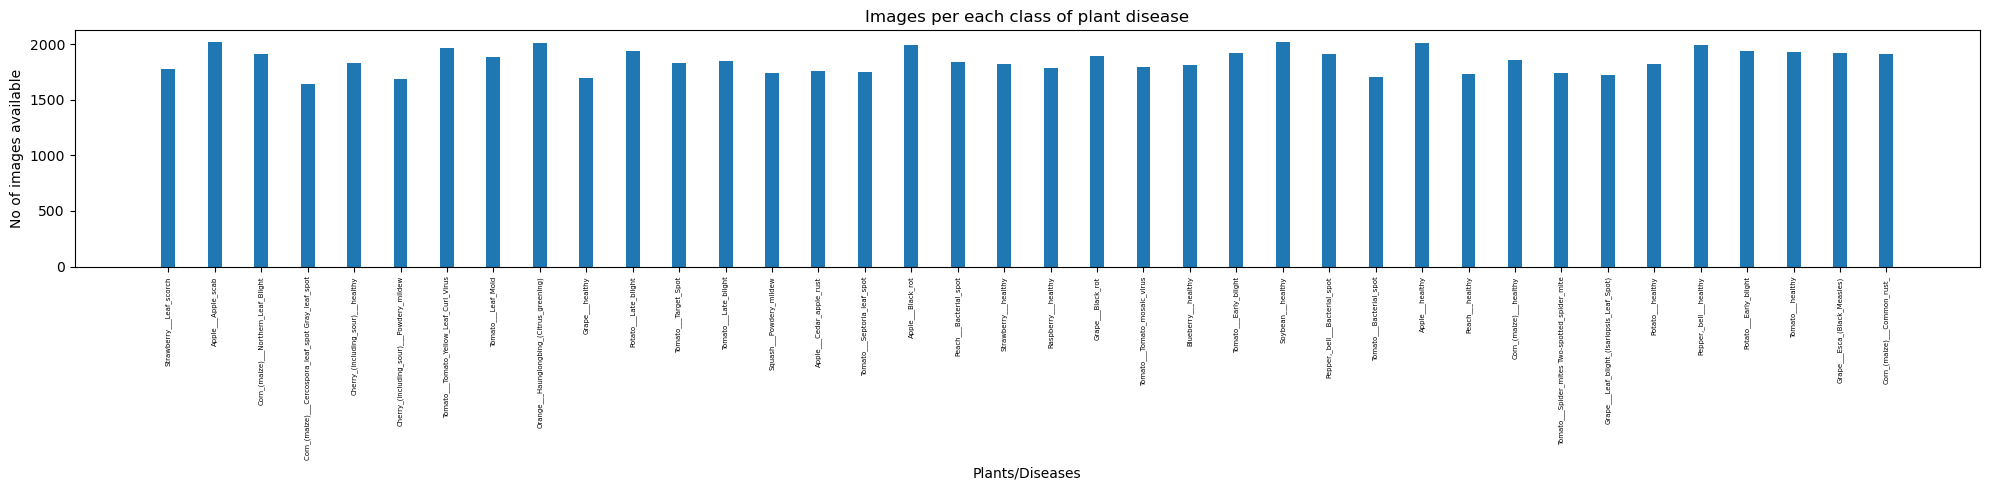

In [10]:
# Plot the data
index = list(range(len(img_per_class)))
plt.figure(figsize=(20, 5))
plt.bar(index, img_per_class["no. of images"], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, list(img_per_class.index), fontsize=5, rotation=90)  # Corrected here to use DataFrame index
plt.title('Images per each class of plant disease')
plt.tight_layout()
plt.show();

#### *Highest Number of Images:*
- *Soybean___healthy (2022 images)*: This class has the highest number of images, indicating a significant amount of data available for healthy soybean plants.
- *Apple___Apple_scab (2016 images)*: Close behind, this class represents one of the most documented diseases in the dataset.
- *Orange__Haunglongbing(Citrus_greening) (2010 images)*: Another highly represented class, suggesting a focus on this citrus disease.

#### *Significant Representation:*
- *Tomato___Tomato_Yellow_Leaf_Curl_Virus (1961 images)*
- *Tomato___Late_blight (1851 images)*
- *Corn_(maize)___Northern_Leaf_Blight (1908 images)*

These classes indicate substantial documentation for diseases affecting tomatoes and maize.

#### *Moderate Representation:*
- *Tomato___Bacterial_spot (1702 images)*
- *Apple___Black_rot (1987 images)*
- *Cherry_(including_sour)___Powdery_mildew (1683 images)*

These classes are moderately represented, providing a good amount of data for analysis.

#### *Lower Representation:*
- *Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot (1642 images)*
- *Squash___Powdery_mildew (1736 images)*
- *Blueberry___healthy (1816 images)*

While still significant, these classes have slightly fewer images compared to others.

### Images available for training

In [11]:
n_train = 0
for value in img_per_class["no. of images"]:
    n_train += value

print(f"There are {n_train} images for training")

There are 70295 images for training


### Displaying Images with PyTorch:

In [12]:
# Set random seed for reproducibility
random_seed = 7
torch.manual_seed(random_seed)

# Load images using ImageFolder and DataLoader
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())
batch_size = 32
train_dl = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size=batch_size, num_workers=2, pin_memory=True)

### Display some images

In [13]:
# Function to display images
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))
    plt.show()

Label :Apple___Apple_scab(0)


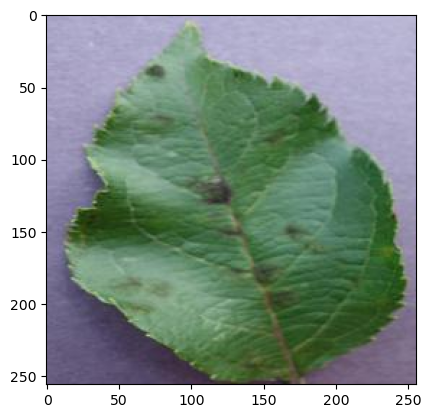

In [14]:
show_image(*train[0])

Label :Tomato___healthy(37)


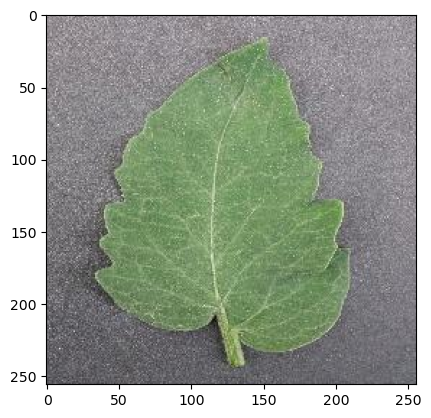

In [15]:
show_image(*train[70000])

Label :Peach___Bacterial_spot(16)


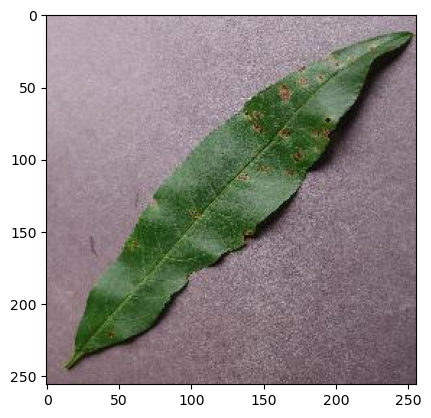

In [16]:
show_image(*train[30000])

In [17]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


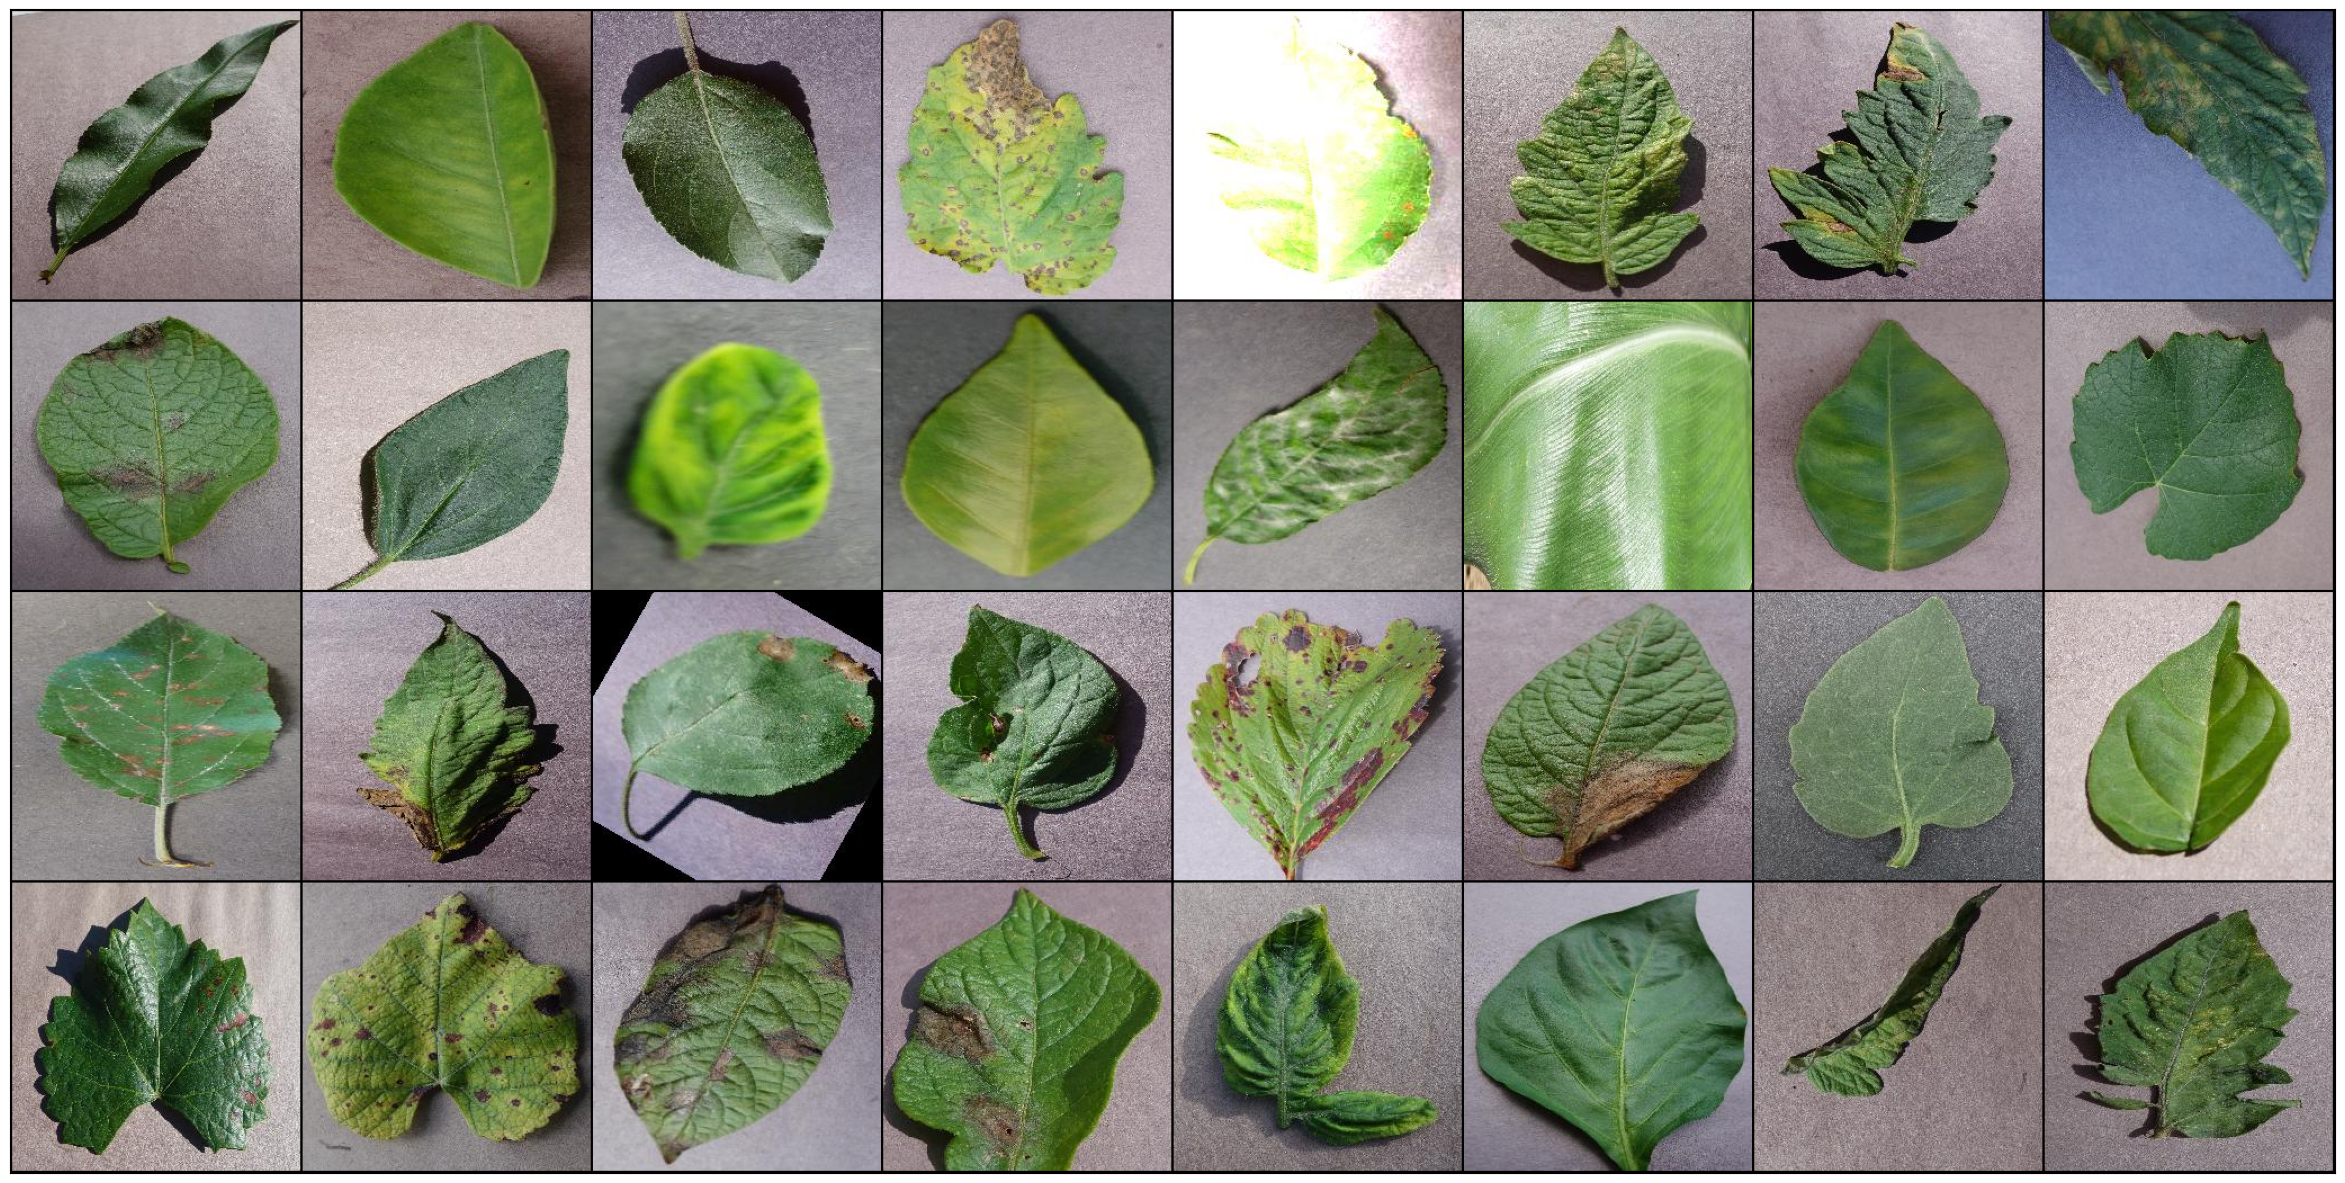

In [18]:
# Function to display a batch of images
def show_batch(data_loader):
    for images, labels in data_loader:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        plt.show()
        break

# Display first batch of training images
show_batch(train_dl)

## 4. Data Preprocessing

In [19]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Check if TensorFlow is using the CPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-10-31 09:08:20.845356: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:216] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Training Image preprocessing

Using TensorFlow to create a dataset from a directory of images.

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred", # Automatically infers the labels from the directory structure.
    label_mode="categorical", # Labels are encoded as one-hot vectors, suitable for multi-class classification.
    class_names=None, 
    color_mode="rgb", # The images are read in RGB format.
    batch_size=32, # The dataset will provide batches of 32 images at a time.
    image_size=(128, 128), # All images will be resized to 128x128 pixels.
    shuffle=True, # The dataset will shuffle the order of the images to ensure randomness.
    seed=None, # No specific seed is used for shuffling.
    validation_split=None, # Not splitting the data into training and validation subsets.
    subset=None, # No subset is specified (can be used for 'training' or 'validation' if validation_split is used).
    interpolation="bilinear", # The method used for resizing images.
    follow_links=False, # Don't follow symbolic links.
    crop_to_aspect_ratio=False # Don't crop images to maintain aspect ratio.
)

Found 70295 files belonging to 38 classes.


A training_set dataset that is ready to be fed into a machine learning model for training, with all images resized, shuffled, and labels prepared in a categorical format.

### Validation Image Preprocessing

In [21]:
# Create a validation dataset from the specified directory
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,                   # Path to the validation image directory
    labels="inferred",           # Automatically infer labels from subdirectory names
    label_mode="categorical",    # Encode labels as one-hot vectors for multi-class classification
    class_names=None,            # If not provided, class names will be inferred from directory structure
    color_mode="rgb",            # Read images in RGB color format
    batch_size=32,               # Number of images to process in each batch
    image_size=(128, 128),       # Resize all images to 128x128 pixels
    shuffle=True,                # Randomly shuffle the dataset
    seed=None,                   # No seed for shuffling, ensures randomness
    validation_split=None,       # Not splitting the data into training and validation subsets
    subset=None,                 # Not specifying a subset (e.g., 'training' or 'validation')
    interpolation="bilinear",    # Use bilinear interpolation for resizing images
    follow_links=False,          # Do not follow symbolic links in the directory
    crop_to_aspect_ratio=False   # Do not crop to maintain aspect ratio
)

Found 17572 files belonging to 38 classes.


Loading the validation images from the valid_dir directory, shuffling them, resize them to 128x128 pixels, and prepare them for model evaluation, with labels automatically inferred from the directory structure.

## 5. Building Model

Create a Convolutional Neural Network (CNN) using TensorFlow's Keras API. This CNN is designed for image classification tasks, particularly for the classification of 38 different classes of plant diseases.

In [22]:
cnn = tf.keras.models.Sequential()

### Adding convolutional layers to extract features from the images

In [23]:
cnn.add(tf.keras.layers.Conv2D(
    filters=32, 
    kernel_size=3, 
    padding='same', 
    activation='relu', 
    input_shape=[128, 128, 3]  # Input layer with shape 128x128 RGB images
))

cnn.add(tf.keras.layers.Conv2D(
    filters=32, 
    kernel_size=3, 
    activation='relu'  # Second convolutional layer
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2, 
    strides=2  # Max pooling to reduce spatial dimensions
))

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Increasing the number of filters to capture more complex features

In [24]:
cnn.add(tf.keras.layers.Conv2D(
    filters=64, 
    kernel_size=3, 
    padding='same', 
    activation='relu'
))

cnn.add(tf.keras.layers.Conv2D(
    filters=64, 
    kernel_size=3, 
    activation='relu'  # Another set of convolutional layers with more filters
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2, 
    strides=2  # Another max pooling layer
))

### Further increasing the number of filters

In [25]:
cnn.add(tf.keras.layers.Conv2D(
    filters=128, 
    kernel_size=3, 
    padding='same', 
    activation='relu'
))

cnn.add(tf.keras.layers.Conv2D(
    filters=128, 
    kernel_size=3, 
    activation='relu'
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2, 
    strides=2
))

### Adding more layers with even more filters

In [26]:
cnn.add(tf.keras.layers.Conv2D(
    filters=256, 
    kernel_size=3, 
    padding='same', 
    activation='relu'
))

cnn.add(tf.keras.layers.Conv2D(
    filters=256, 
    kernel_size=3, 
    activation='relu'
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2, 
    strides=2
))

### Final set of convolutional layers

In [27]:
cnn.add(tf.keras.layers.Conv2D(
    filters=512, 
    kernel_size=3, 
    padding='same', 
    activation='relu'
))

cnn.add(tf.keras.layers.Conv2D(
    filters=512, 
    kernel_size=3, 
    activation='relu'
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2, 
    strides=2
))

In [28]:
# Dropout layer to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

# Flatten the output from the convolutional layers
cnn.add(tf.keras.layers.Flatten())

# Fully connected (dense) layer to interpret features
cnn.add(tf.keras.layers.Dense(
    units=1500, 
    activation='relu'
))

# Dropout layer to further prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.4))

# Output layer with softmax activation for multi-class classification
cnn.add(tf.keras.layers.Dense(
    units=38,  # Number of output classes
    activation='softmax'
))

## 6. Compiling and Training Phase

Compile and summarize a Convolutional Neural Network (CNN) model using TensorFlow.

In [29]:
# Compile the model with new optimizers
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Summary of the model
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

The network is quite deep with multiple convolutional and pooling layers, allowing it to capture complex patterns in images. The use of dropout layers helps prevent overfitting, while dense layers facilitate the final classification into 38 categories.

In [30]:
training_history = cnn.fit(x=training_set, validation_data=validation_set ,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1385s 629ms/step - accuracy: 0.4120 - loss: 2.0873 - val_accuracy: 0.8555 - val_loss: 0.4591
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1382s 629ms/step - accuracy: 0.8512 - loss: 0.4759 - val_accuracy: 0.9207 - val_loss: 0.2491
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1398s 636ms/step - accuracy: 0.9141 - loss: 0.2715 - val_accuracy: 0.9343 - val_loss: 0.2060
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1427s 649ms/step - accuracy: 0.9403 - loss: 0.1853 - val_accuracy: 0.9424 - val_loss: 0.1830
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1400s 637ms/step - accuracy: 0.9546 - loss: 0.1368 - val_accuracy: 0.9535 - val_loss: 0.1439
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1397s 636ms/step - accuracy: 0.9648 - loss: 0.1071 - val_accuracy: 0.9572 - val_loss: 0.1352
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1401s 636ms/step - accuracy: 0.9710 - loss: 0.0916 - val_accuracy: 0.9523 - val_loss: 0.1536
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1401s 638ms/s

The training process runs for 10 epochs, meaning the model goes through the entire dataset 10 times. For each epoch, the output shows the training accuracy and loss, as well as the validation accuracy and loss. Accuracy measures how often the model's predictions are correct. Loss measures how well the model's predictions match the actual outcomes. Lower loss indicates better performance. Validation Metrics(val_accuracy and val_loss) are calculated on a separate validation dataset to evaluate the model's performance on unseen data. The model starts with an accuracy of 41.20% and a loss of 2.0873. The validation accuracy is 85.55%, and the validation loss is 0.4591. By the end of training, the model achieves an accuracy of 98.22% and a loss of 0.0584. The validation accuracy is 96.77%, and the validation loss is 0.1063.

## 7. Evaluating Model

In [31]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 421s 192ms/step - accuracy: 0.9899 - loss: 0.0314
Training accuracy: 0.990980863571167


The CNN model is evaluated on the training dataset. The process involves 2197 steps. The model achieves an accuracy of approximately 0.99 (or 99%) on the training set. The loss value is 0.0314, indicating how well the model's predictions match the actual outcomes.

In [32]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 101s 184ms/step - accuracy: 0.9689 - loss: 0.1041
Validation accuracy: 0.9676758646965027


The CNN model is evaluated on the validation dataset. The process involves 550 steps. The model achieves an accuracy of approximately 0.9689 (or 96.89%) on the validation set. The loss value is 0.1041, indicating how well the model's predictions match the actual outcomes.

## 8. Saving Model

In [33]:
cnn.save('model/trained_model.keras')

In [34]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6141119599342346,
  0.8717831969261169,
  0.9194821715354919,
  0.9430115818977356,
  0.9573796391487122,
  0.9661568999290466,
  0.9719894528388977,
  0.9770964980125427,
  0.9795433282852173,
  0.9827014803886414],
 'loss': [1.3118606805801392,
  0.4113180935382843,
  0.2513802647590637,
  0.1761358231306076,
  0.13036921620368958,
  0.10304751992225647,
  0.08635388314723969,
  0.07127174735069275,
  0.06286109238862991,
  0.055599991232156754],
 'val_accuracy': [0.8554518818855286,
  0.9206692576408386,
  0.9343273639678955,
  0.9423514604568481,
  0.9535055756568909,
  0.9572046399116516,
  0.9523105025291443,
  0.9580013751983643,
  0.9532210230827332,
  0.9676758646965027],
 'val_loss': [0.45910224318504333,
  0.24911408126354218,
  0.2059614509344101,
  0.1829604059457779,
  0.1438623070716858,
  0.13519719243049622,
  0.15362311899662018,
  0.1378641426563263,
  0.16334614157676697,
  0.10629098117351532]}

In [35]:
#Recording History in json
import json
with open('JSON/training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [36]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## 9. Accuracy Visualization

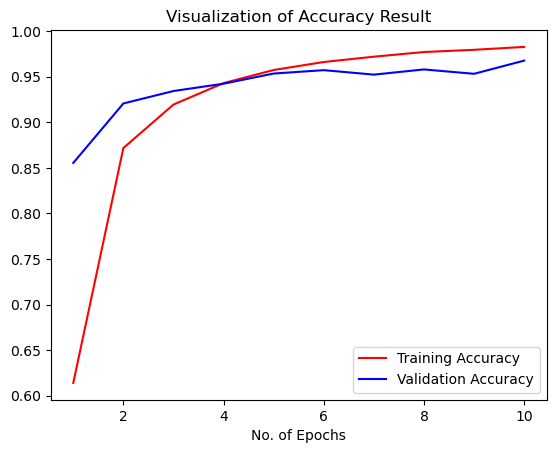

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

- Training Accuracy starts around 0.60 at epoch 1, rapidly increases reaching above 0.95 by epoch 4. It stabilizes around 0.97 by epoch 10.
- Validation Accuracy starts around 0.85 at epoch 1, increases steadily fluctuating slightly around 0.95 from epoch 4 to epoch 10.

## 10. Other metrics for model evaluation

In [48]:
class_name = validation_set.class_names

In [51]:
valid_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [52]:
y_pred = cnn.predict(valid_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 170s 10ms/step


In [54]:
# Combine all the true labels from the validation set into a single tensor
true_categories = tf.concat([y for x, y in valid_set], axis=0)

# Convert the one-hot encoded true labels into their actual category indices
Y_true = tf.argmax(true_categories, axis=1)

# Generate a confusion matrix comparing the true labels to the predicted labels
cm = confusion_matrix(Y_true, predicted_categories)

# Optional: To get a detailed classification report
report = classification_report(Y_true, predicted_categories)

# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.88      0.92       504
                                 Apple___Black_rot       1.00      0.94      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.90      0.99      0.94       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.96      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.98      0.

- Precision, Recall, and F1-Score: These metrics evaluate the model's performance in classifying each disease correctly.
- Support: Number of actual instances for each class.
- Overall Accuracy: The model has an accuracy of 0.97, meaning it correctly identifies 97% of the instances.
- Macro and Weighted Averages: Both averages for precision, recall, and F1-score are 0.97, indicating consistent performance across all classes.

### Visualizing the Confussion Metric

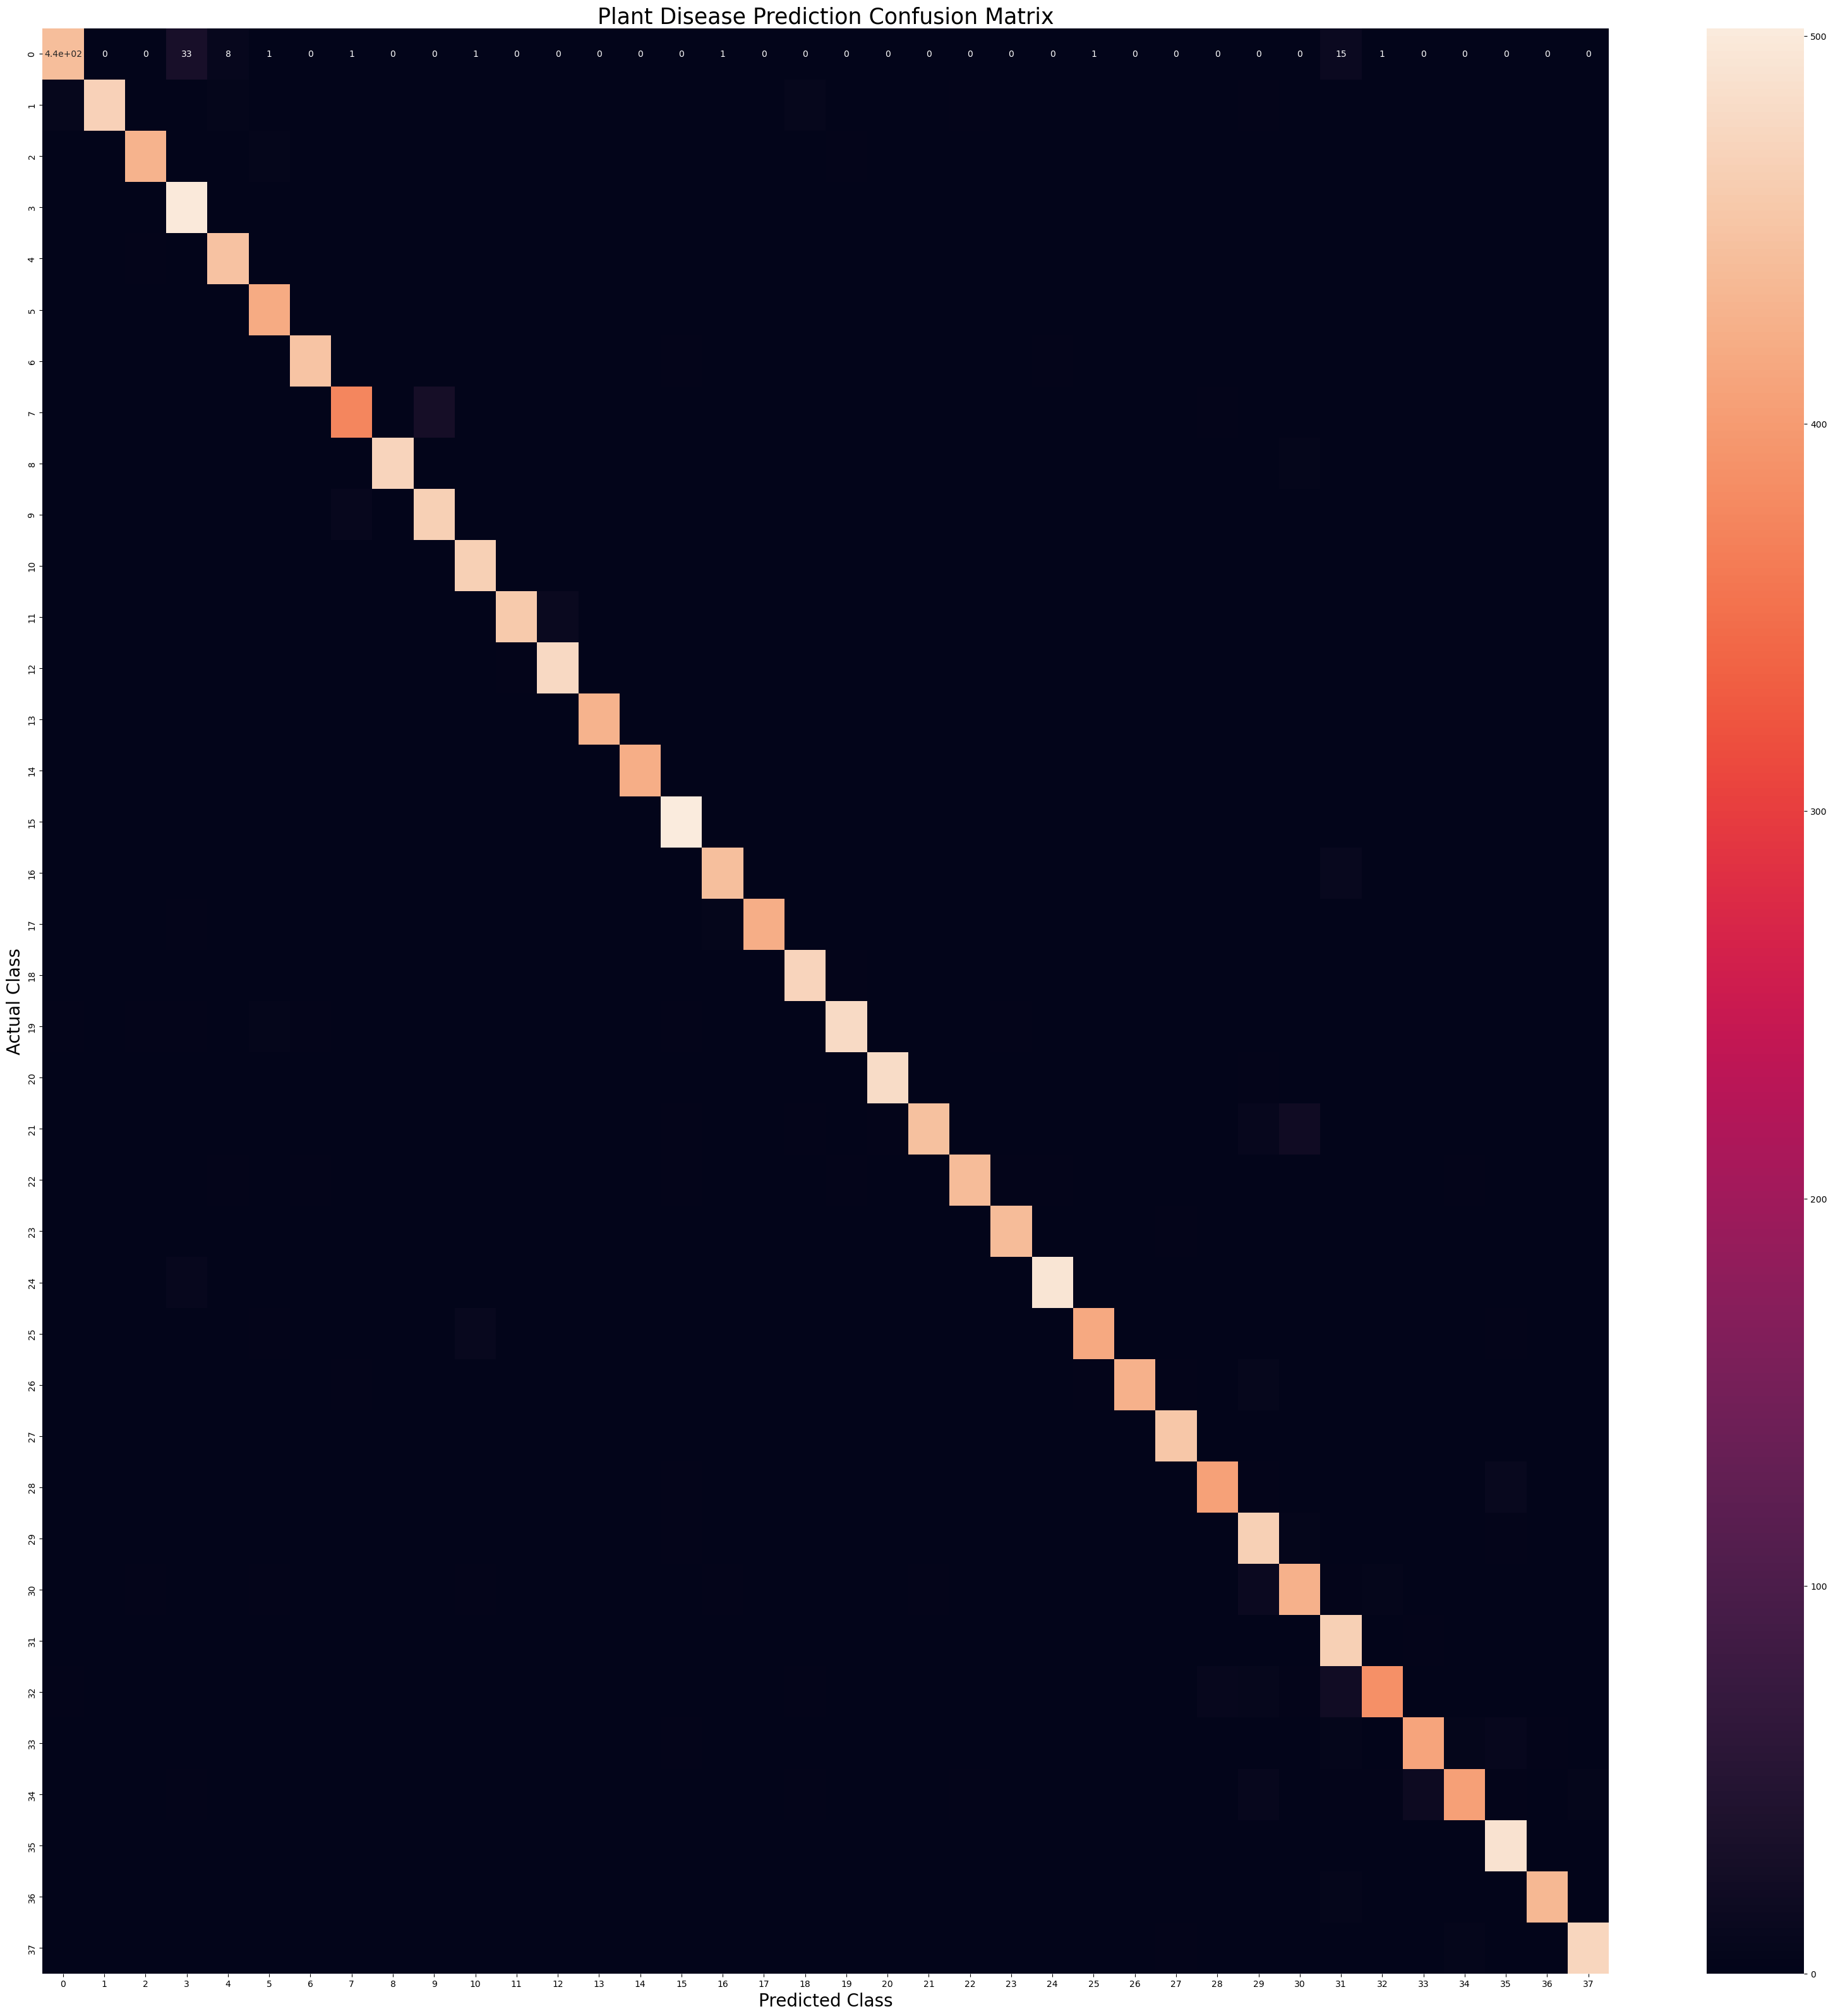

In [56]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

## 11. Test Set Image Prediction

In [58]:
class_name = valid_set.class_names

In [59]:
# Loading the Model
cnn = tf.keras.models.load_model('model/trained_model.keras')

### Visualising and Performing Prediction on Single image

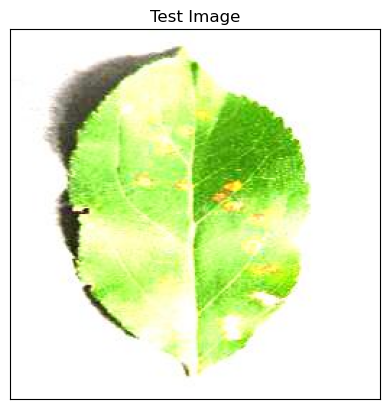

In [62]:
#Test Image Visualization
image_path = 'data/test/AppleCedarRust1.JPG'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB

# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

#### Image Preprocessing and Prediction:

In [65]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
[[1.5856619e-12 3.2208104e-13 1.0000000e+00 4.0655708e-14 3.6457379e-10
  2.8651851e-12 4.8263624e-15 1.9543654e-14 3.1773840e-17 4.3883169e-17
  6.0961747e-18 2.9741973e-10 5.7232154e-13 3.9764094e-14 8.3184632e-14
  1.6204021e-10 3.3364728e-11 1.0385169e-12 2.4909057e-13 7.7942505e-12
  1.1692607e-16 1.3786623e-15 3.6696042e-14 7.4423525e-15 6.0496411e-16
  3.4001213e-17 3.2378104e-13 9.5389429e-15 6.6574812e-10 2.0171214e-08
  1.1470598e-10 5.4984012e-13 2.4251159e-12 3.7689108e-15 2.2830475e-09
  1.4966323e-11 1.0732551e-11 8.6888803e-12]]


- The image is loaded and resized to 128x128 pixels.
- The image is converted to an array and reshaped to match the input shape expected by the CNN.
- The CNN model makes predictions on the processed image.

#### Prediction Output:

In [66]:
# Return index of max element
result_index = np.argmax(predictions)
print(result_index)

2


- The predictions are printed as an array of probabilities for each class.
- The index of the maximum probability is found to determine the predicted class.

#### Displaying the Prediction:

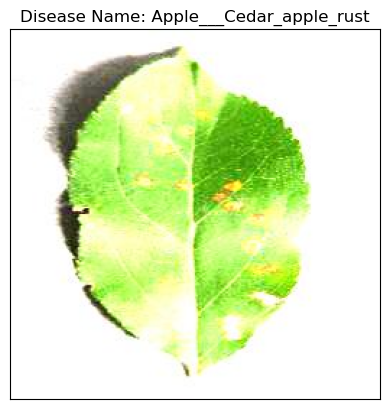

In [67]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

- The predicted class name is retrieved using the index.
- The leaf image is displayed with the predicted disease name as the title.

## 12. Conclusion

### Insights
1. **AI Integration in Agriculture**: The project demonstrates how AI can significantly enhance agricultural practices by providing real-time disease detection, which is crucial for improving crop health and yield.
2. **User Accessibility**: The development of a WhatsApp chatbot makes the technology accessible to farmers with varying levels of technical expertise, ensuring that even those in remote areas can benefit from the system.
3. **Data-Driven Decisions**: By utilizing AI for plant disease diagnosis, farmers can make informed decisions quickly, potentially reducing crop losses and improving food security.
4. **Sustainability Focus**: The project promotes sustainable farming practices by reducing reliance on pesticides through timely disease detection and management.
5. **Community Empowerment**: The initiative empowers local farmers by providing them with tools and knowledge to combat plant diseases, fostering a sense of ownership and responsibility towards their crops.

### Model Performance Overview
- The model was trained over 10 epochs, achieving a final training accuracy of 98.22% and a validation accuracy of 96.77%. 
- The loss values decreased significantly over the epochs, indicating that the model improved its predictions as training progressed.
- The validation loss showed some fluctuations, suggesting that while the model is generally effective, there may be instances of overfitting or areas for improvement in generalization to unseen data.

### Limitations
1. **Data Quality and Diversity**: The model's performance is heavily reliant on the quality and diversity of the training dataset. Limited or biased data can lead to poor generalization.
2. **Environmental Variability**: The model may struggle with variations in environmental conditions (e.g., lighting, background) that were not present in the training data.
3. **Complexity of Diseases**: Some plant diseases may exhibit similar symptoms, making it challenging for the model to differentiate between them accurately.
4. **User Dependency**: The effectiveness of the system relies on users accurately capturing and submitting images of their plants, which may not always happen.
5. **Technical Limitations**: The deployment of the system may face challenges related to internet connectivity and smartphone access in rural areas.

### Recommendations
1. **Data Augmentation**: To improve model robustness, consider augmenting the dataset with more diverse images, including various angles, lighting conditions, and backgrounds.
2. **User Training**: Provide training sessions or materials for farmers on how to use the system effectively, including tips on capturing high-quality images.
3. **Regular Model Updates**: Continuously update the model with new data to improve its accuracy and adapt to emerging plant diseases.
4. **Feedback Mechanism**: Implement a feedback system where users can report inaccuracies, helping to refine the model and improve user trust.
5. **Expand Disease Coverage**: Gradually expand the model to cover more plant species and diseases, enhancing its utility for a broader range of crops.

### Future Work
1. **Integration with IoT Devices**: Explore the integration of IoT devices for real-time monitoring of plant health, providing more comprehensive data for disease prediction.
2. **Multilingual Support**: Develop the system to support multiple languages, making it accessible to a wider audience in different regions.
3. **Collaboration with Agricultural Experts**: Partner with agronomists and plant pathologists to validate the model's predictions and improve its accuracy.
4. **Mobile App Development**: Consider developing a dedicated mobile application that offers additional features, such as disease management tips and community forums.
5. **Longitudinal Studies**: Conduct studies to assess the long-term impact of the system on crop yields and farmer practices, providing valuable insights for future enhancements.